In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import matplotlib as plt

<h1> Data Preprocessing and EDA <h1>

In [2]:
#importing data
df_anime = pd.read_csv("anime.csv")
df_rating = pd.read_csv("rating.csv.zip")

In [3]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df_anime.shape

(12294, 7)

In [6]:
df_anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [46]:
df_anime.dropna(axis = 0, inplace = True)

In [48]:
df_rating.dropna(axis = 0, inplace = True)

In [49]:
df_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [47]:
df_anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [61]:
df_anime.drop_duplicates()
df_rating.drop_duplicates()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [11]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [12]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [14]:
df_rating.shape

(7813737, 3)

In [15]:
#changing datatype of anime_id to string
df_anime["anime_id"] = df_anime["anime_id"].astype(str)

In [52]:
df_rating["user_id"] = df_rating["user_id"].astype(str)
df_rating["anime_id"] = df_rating["anime_id"].astype(str)

In [16]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  object 
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 672.5+ KB


In [17]:
contains = [df_anime['name'].str.contains(i) for i in ["&"]]
result = df_anime[np.all(contains, axis=0)]
result
#we can see some there are a lot of names which are not cleaned

,anime_id,name,genre,type,episodes,rating,members
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
187,28675,Kyoukai no Kanata Movie: I&#039;ll Be Here - M...,"Fantasy, Slice of Life, Supernatural",Movie,1,8.35,59815
194,10153,Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#...,"Action, Comedy, Drama, Magic, Super Power",Movie,1,8.34,13315
359,4901,Black Lagoon: Roberta&#039;s Blood Trail,"Action, Seinen",OVA,5,8.15,108099
...,...,...,...,...,...,...,...
11647,16187,"Marriage Blue: &quot;Konyakusha ga Iru no ni, ...",Hentai,OVA,1,6.32,1755
11752,28169,Buta no Gotoki Sanzoku ni Torawarete Shojo wo ...,Hentai,OVA,Unknown,6.14,1992
11971,4561,Zoku Gosenzo San&#039;e,Hentai,OVA,4,5.81,651
12086,2874,Charm Point 1: Sister&#039;s Rondo,Hentai,OVA,1,5.57,868


In [18]:
import html

In [19]:
#cleaning names
df_anime['name'] = df_anime['name'].apply(html.unescape)

In [20]:
df_anime["type"].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

Text(0, 0.5, 'Movies')

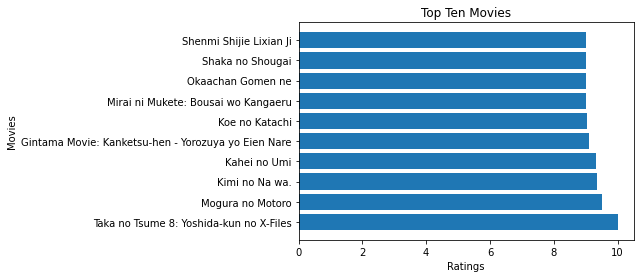

In [21]:
movies_df = df_anime[df_anime["type"] == "Movie"].sort_values(by="rating", ascending=False).head(10)
plt.pyplot.barh(movies_df["name"],movies_df["rating"])
plt.pyplot.title("Top Ten Movies")
plt.pyplot.xlabel("Ratings")
plt.pyplot.ylabel("Movies")

Text(0, 0.5, 'TV Shows')

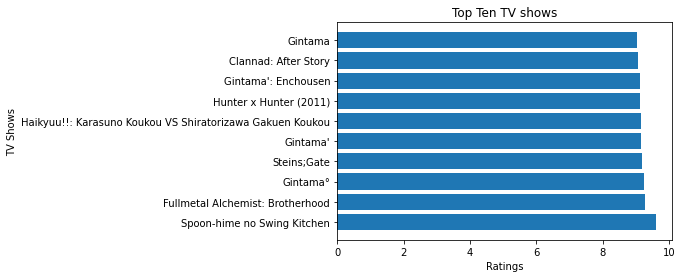

In [22]:
tv_df = df_anime[df_anime["type"] == "TV"].sort_values(by="rating", ascending=False).head(10)
plt.pyplot.barh(tv_df["name"],tv_df["rating"])
plt.pyplot.title("Top Ten TV shows")
plt.pyplot.xlabel("Ratings")
plt.pyplot.ylabel("TV Shows")

Text(0, 0.5, 'OVA Shows')

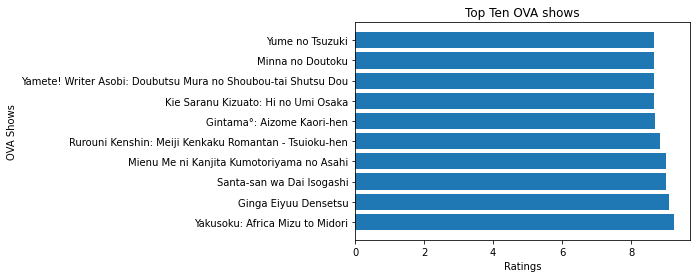

In [23]:
ova_df = df_anime[df_anime["type"] == "OVA"].sort_values(by="rating", ascending=False).head(10)
plt.pyplot.barh(ova_df["name"],ova_df["rating"])
plt.pyplot.title("Top Ten OVA shows")
plt.pyplot.xlabel("Ratings")
plt.pyplot.ylabel("OVA Shows")

Text(0, 0.5, 'special Shows')

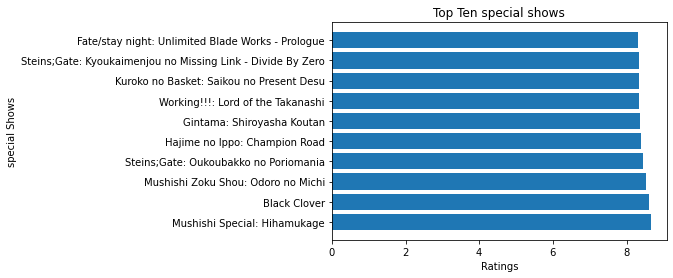

In [24]:
special_df = df_anime[df_anime["type"] == "Special"].sort_values(by="rating", ascending=False).head(10)
plt.pyplot.barh(special_df["name"],special_df["rating"])
plt.pyplot.title("Top Ten special shows")
plt.pyplot.xlabel("Ratings")
plt.pyplot.ylabel("special Shows")

Text(0, 0.5, 'Music Shows')

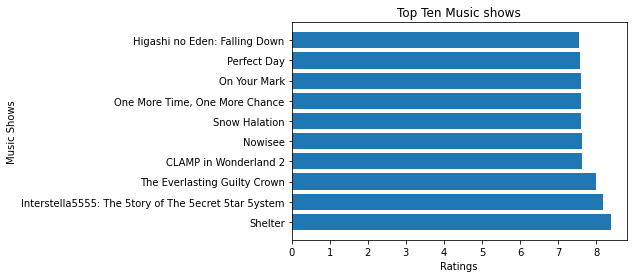

In [37]:
music_df = df_anime[df_anime["type"] == "Music"].sort_values(by="rating", ascending=False).head(10)
plt.pyplot.barh(music_df["name"],music_df["rating"])
plt.pyplot.title("Top Ten Music shows")
plt.pyplot.xlabel("Ratings")
plt.pyplot.ylabel("Music Shows")

Text(0, 0.5, 'ONA Shows')

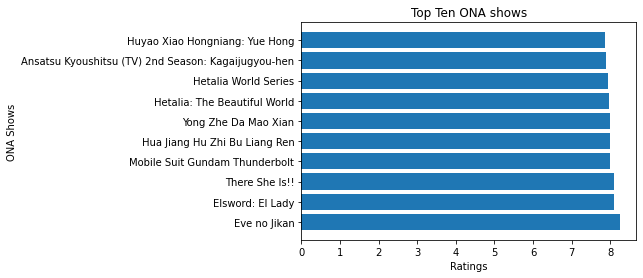

In [26]:
ona_df = df_anime[df_anime["type"] == "ONA"].sort_values(by="rating", ascending=False).head(10)
plt.pyplot.barh(ona_df["name"],ona_df["rating"])
plt.pyplot.title("Top Ten ONA shows")
plt.pyplot.xlabel("Ratings")
plt.pyplot.ylabel("ONA Shows")

Text(0, 0.5, 'User IDs')

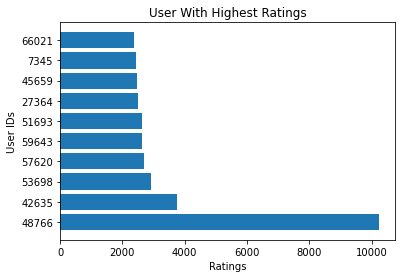

In [56]:
num_ratings_df = df_rating.groupby("user_id").size().reset_index(name="num_ratings").sort_values(by="num_ratings", ascending=False)[:10]
plt.pyplot.barh(num_ratings_df["user_id"],num_ratings_df["num_ratings"])
plt.pyplot.title("User With Highest Ratings")
plt.pyplot.xlabel("Ratings")
plt.pyplot.ylabel("User IDs")

In [54]:
num_ratings_df

,user_id,num_ratings
43073,48766,10227
36263,42635,3747
48553,53698,2905
52912,57620,2702
55159,59643,2633
46326,51693,2622
19295,27364,2499
39622,45659,2469
70500,7345,2429
62247,66021,2362


In [62]:
df = df_anime.merge(df_rating, how = "left", on = ["anime_id"])
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0


In [68]:
pd.DataFrame(df["anime_id"].value_counts())

,anime_id
1535,39340
11757,30583
16498,29584
1575,27718
226,27506
...,...
32698,1
4544,1
29489,1
11625,1
